In [2]:
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import pickle
import numpy as np
import training
import config
import matplotlib.pyplot as plt

In [3]:
a = torch.load('./constraint_data.loader')

In [64]:
train_loader = a['train']
valid_loader = a['valid']
test_loader = a['test']

In [65]:
SEEDs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
layers = [2, 3, 4, 5, 6, 7, 8, 9]
neurons = [2, 3, 4, 5, 6, 7, 8, 9]
lrs = [-3, -4, -5]

In [66]:
lossfunction = torch.nn.MSELoss()

In [67]:
results = torch.zeros([10, 8, 8, 3, 3])

In [68]:
for s, seed in enumerate(SEEDs):
    for l, num_layer in enumerate(layers):
        print(f'processing seed {seed} layer {num_layer}...')
        for n, num_neuron in enumerate(neurons):
            for m, lr in enumerate(lrs):
                
                exp_setup = f'{num_layer}_{num_neuron}_{lr}_{seed}'
                
                NN_temp = torch.load(f'./NNs/constrainter_{exp_setup}')
                
                for x_train, y_train in train_loader:
                    prediction_train = NN_temp(x_train)
                for x_valid, y_valid in valid_loader:
                    prediction_valid = NN_temp(x_valid)
                for x_test, y_test in test_loader:
                    prediction_test = NN_temp(x_test)
            
                loss_train = lossfunction(y_train, prediction_train)
                loss_valid = lossfunction(y_valid, prediction_valid)
                loss_test  = lossfunction(y_test,  prediction_test)
            
                results[s, l, n, m, 0] = loss_train
                results[s, l, n, m, 1] = loss_valid
                results[s, l, n, m, 2] = loss_test

processing seed 0 layer 2...
processing seed 0 layer 3...
processing seed 0 layer 4...
processing seed 0 layer 5...
processing seed 0 layer 6...
processing seed 0 layer 7...
processing seed 0 layer 8...
processing seed 0 layer 9...
processing seed 1 layer 2...
processing seed 1 layer 3...
processing seed 1 layer 4...
processing seed 1 layer 5...
processing seed 1 layer 6...
processing seed 1 layer 7...
processing seed 1 layer 8...
processing seed 1 layer 9...
processing seed 2 layer 2...
processing seed 2 layer 3...
processing seed 2 layer 4...
processing seed 2 layer 5...
processing seed 2 layer 6...
processing seed 2 layer 7...
processing seed 2 layer 8...
processing seed 2 layer 9...
processing seed 3 layer 2...
processing seed 3 layer 3...
processing seed 3 layer 4...
processing seed 3 layer 5...
processing seed 3 layer 6...
processing seed 3 layer 7...
processing seed 3 layer 8...
processing seed 3 layer 9...
processing seed 4 layer 2...
processing seed 4 layer 3...
processing see

In [69]:
result_seed = results.mean(0)[:,:,:,2]
result_seed.shape

torch.Size([8, 8, 3])

## study on the impact of learning rate

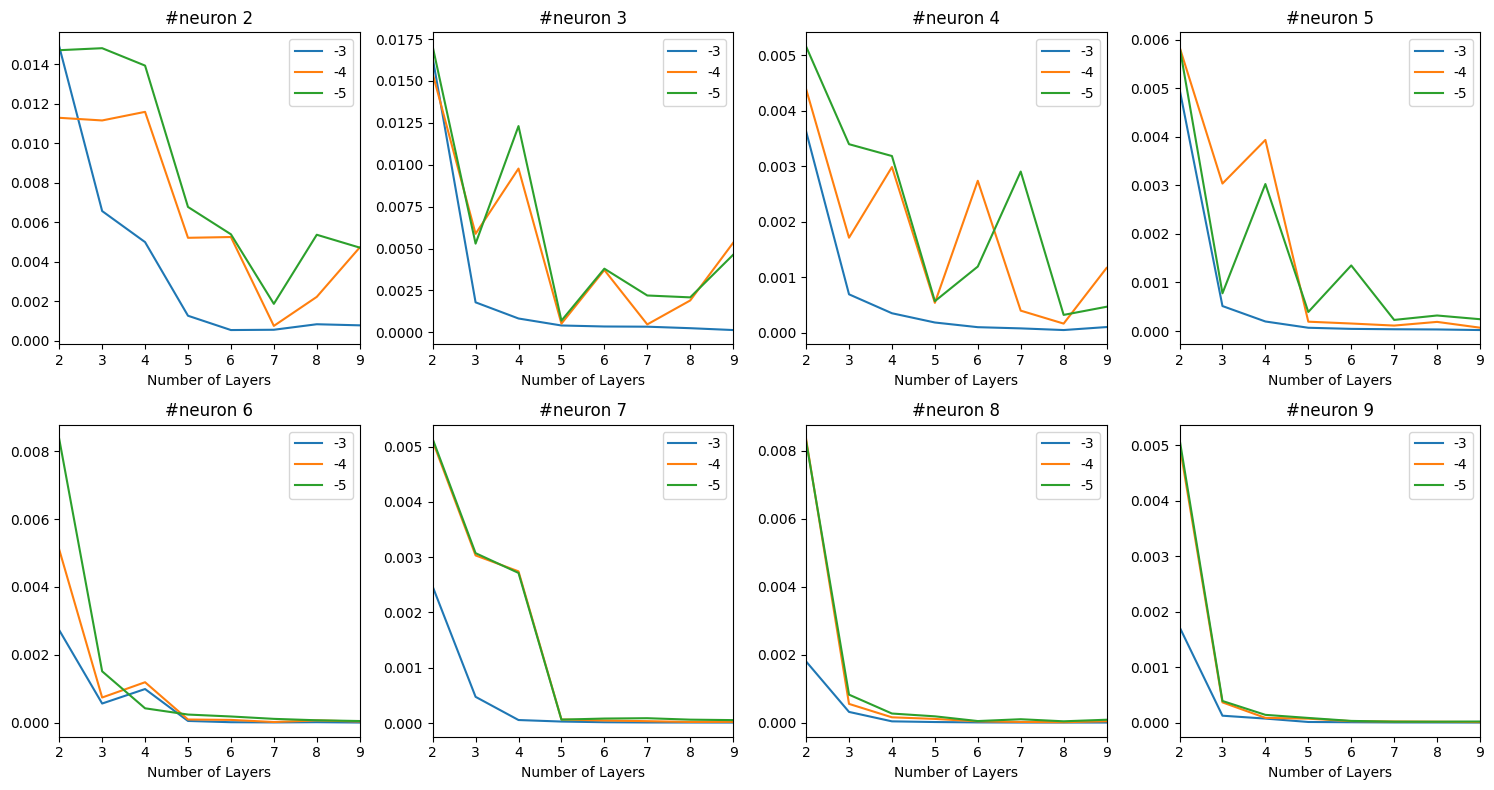

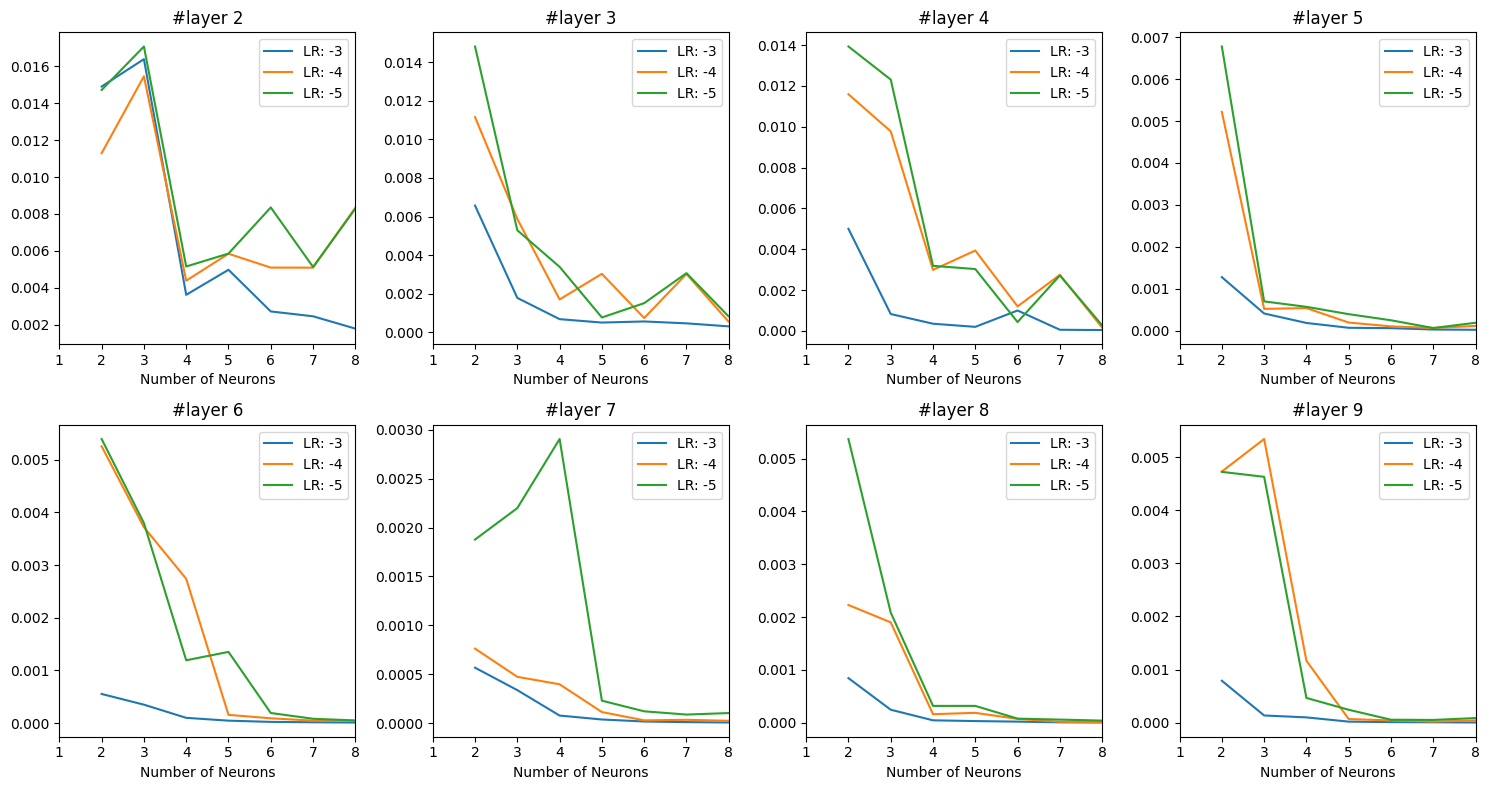

In [71]:
import matplotlib.pyplot as plt

# Assuming 'result_seed', 'lrs', and 'layers' are predefined
num_neurons = 8  # Number of neurons
num_lrs = 3  # Number of learning rates, assumed from your 'range(3)'

# Create a figure with a 2x4 grid of axes
fig, axs = plt.subplots(2, 4, figsize=(15, 8))  # You can adjust 'figsize' as per your need

for num_neuron in range(num_neurons):
    # Calculate indices for the subplot
    ix, iy = divmod(num_neuron, 4)
    
    for lr in range(num_lrs):
        # 'result_seed' should be a tensor or an array-like object containing the data you want to plot
        data = result_seed[:, num_neuron, lr].detach().numpy()  # Assuming it's a tensor that requires detaching
        axs[ix, iy].plot(layers, data, label=f'{lrs[lr]}')  # 'layers' is used as the x variable here
    
    axs[ix, iy].legend()  # Add a legend to each subplot
    axs[ix, iy].set_title(f'#neuron {neurons[num_neuron]}')  # Set titles for individual plots
    axs[ix, iy].set_xlim([2,9])
    axs[ix, iy].set_xlabel('Number of Layers')  # Set the x-label for each subplot

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import numpy as np

# Assuming 'result_seed', 'lrs', and 'layers' are predefined
num_neurons = 8  # Number of neurons
num_lrs = 3  # Number of learning rates, assumed from your 'range(3)'

# Create a figure with a 2x4 grid of axes
fig, axs = plt.subplots(2, 4, figsize=(15, 8))  # You can adjust 'figsize' as per your need

# Assuming 'layers' is an iterable with the indices of layers you want to plot.
# Also assuming that the layers are 0-indexed.
for idx, layer in enumerate(layers):
    # Calculate indices for the subplot
    ix, iy = divmod(idx, 4)

    for lr in range(num_lrs):
        # 'result_seed' should be a tensor or an array-like object containing the data you want to plot
        # Here, we're gathering data across all neurons for a specific layer and learning rate.
        data = result_seed[idx, :, lr].detach().numpy()  # Assuming it's a tensor that requires detaching
        axs[ix, iy].plot(neurons, data, label=f'LR: {lrs[lr]}')  # 'neurons' is used as the x variable here
    
    axs[ix, iy].legend()  # Add a legend to each subplot
    axs[ix, iy].set_title(f'#layer {layers[idx]}')  # Set titles for individual plots
    axs[ix, iy].set_xlim([1, num_neurons])
    axs[ix, iy].set_xlabel('Number of Neurons')  # Set the x-label for each subplot

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## study on layer

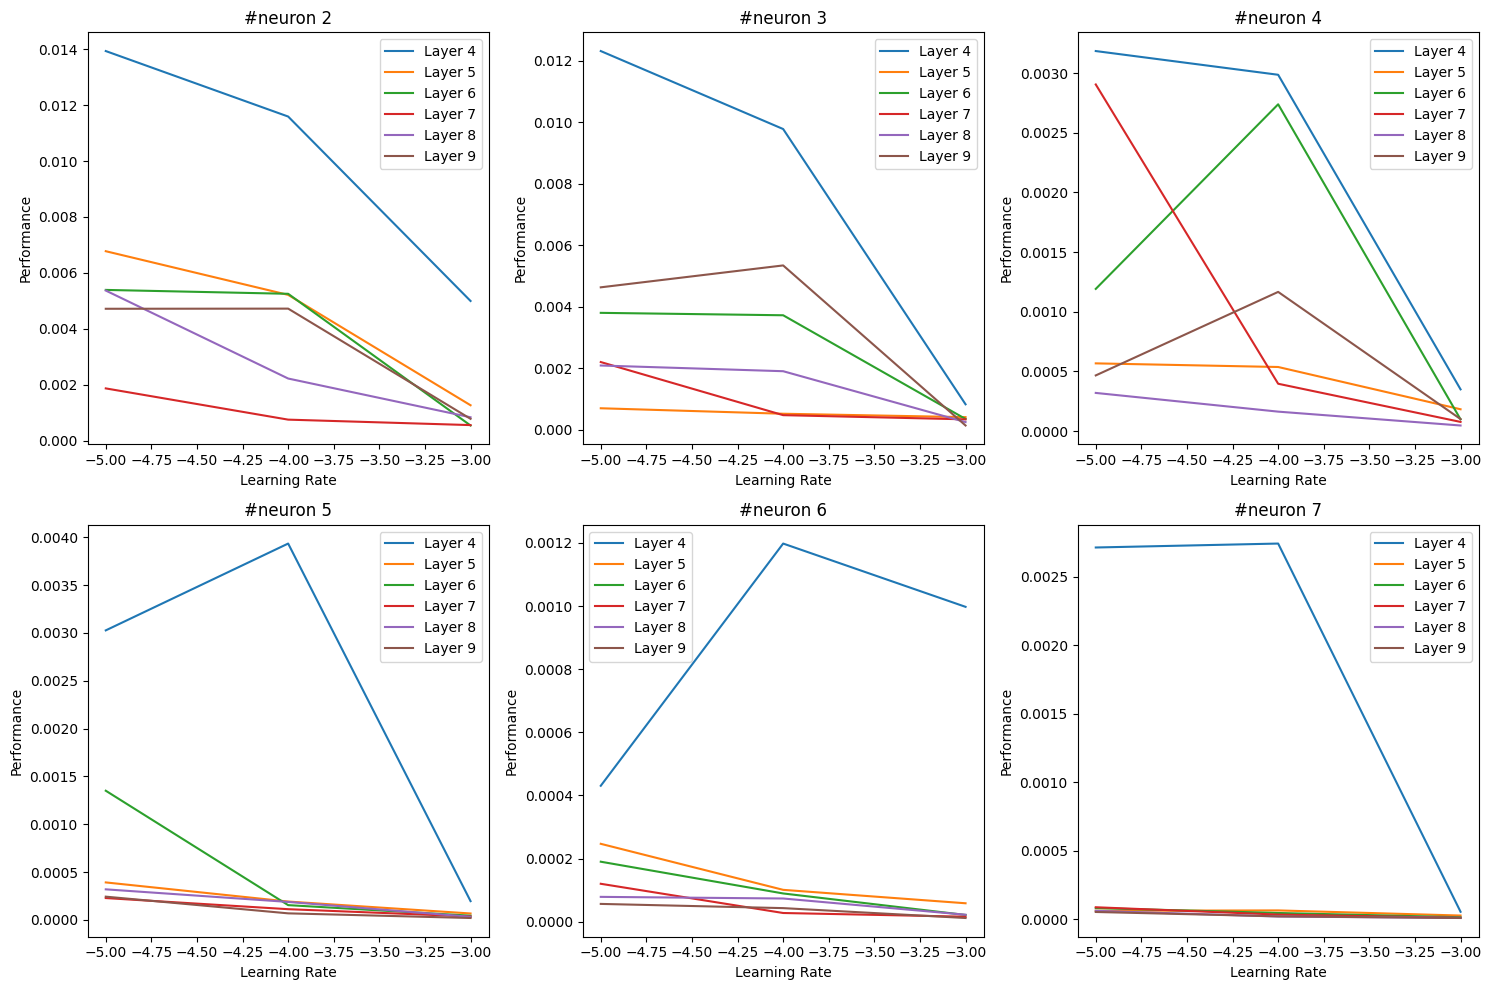

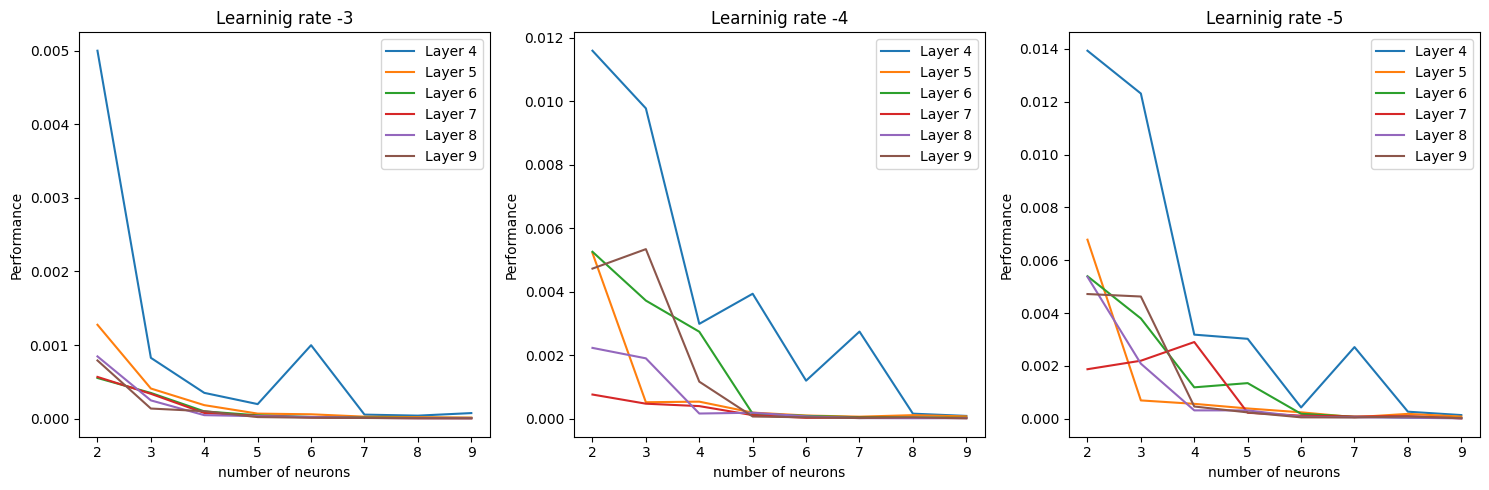

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'result_seed', 'lrs', and 'layers' are predefined
num_neurons = 8  # Number of neurons

# Create a figure with a 2x3 grid of axes
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # You can adjust 'figsize' as per your need

# We are assuming that 'neuron' should be ranged from 0 to 5 for a 2x3 grid, change as needed.
for idx, neuron in enumerate(range(6)):
    # Calculate indices for the subplot
    ix, iy = divmod(idx, 3)
    
    for layer in range(2, 8):
        # 'result_seed' should be a tensor or an array-like object containing the data you want to plot
        data = result_seed[layer, neuron, :].detach().numpy()  # Assuming it's a tensor that requires detaching
        axs[ix, iy].plot(lrs, data, label=f'Layer {layers[layer]}')  # 'lrs' is used as the x variable here
    
    axs[ix, iy].legend()  # Add a legend to each subplot
    axs[ix, iy].set_title(f'#neuron {neurons[idx]}')  # Set titles for individual plots
    axs[ix, iy].set_xlabel('Learning Rate')  # Set the x-label for each subplot
    axs[ix, iy].set_ylabel('Performance')  # Set the y-label for each subplot; adjust as per your metric


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'result_seed', 'lrs', and 'layers' are predefined

# Create a figure with a 2x3 grid of axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # You can adjust 'figsize' as per your need

# We are assuming that 'neuron' should be ranged from 0 to 5 for a 2x3 grid, change as needed.
for idx, lr in enumerate(range(3)):
    # Calculate indices for the subplot
    ix = idx
    
    for layer in range(2, 8):
        # 'result_seed' should be a tensor or an array-like object containing the data you want to plot
        data = result_seed[layer, :, lr].detach().numpy()  # Assuming it's a tensor that requires detaching
        axs[ix].plot(neurons, data, label=f'Layer {layers[layer]}')  # 'lrs' is used as the x variable here
    
    axs[ix].legend()  # Add a legend to each subplot
    axs[ix].set_title(f'Learninig rate {lrs[idx]}')  # Set titles for individual plots
    axs[ix].set_xlabel('number of neurons')  # Set the x-label for each subplot
    axs[ix].set_ylabel('Performance')  # Set the y-label for each subplot; adjust as per your metric


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## study on neurons

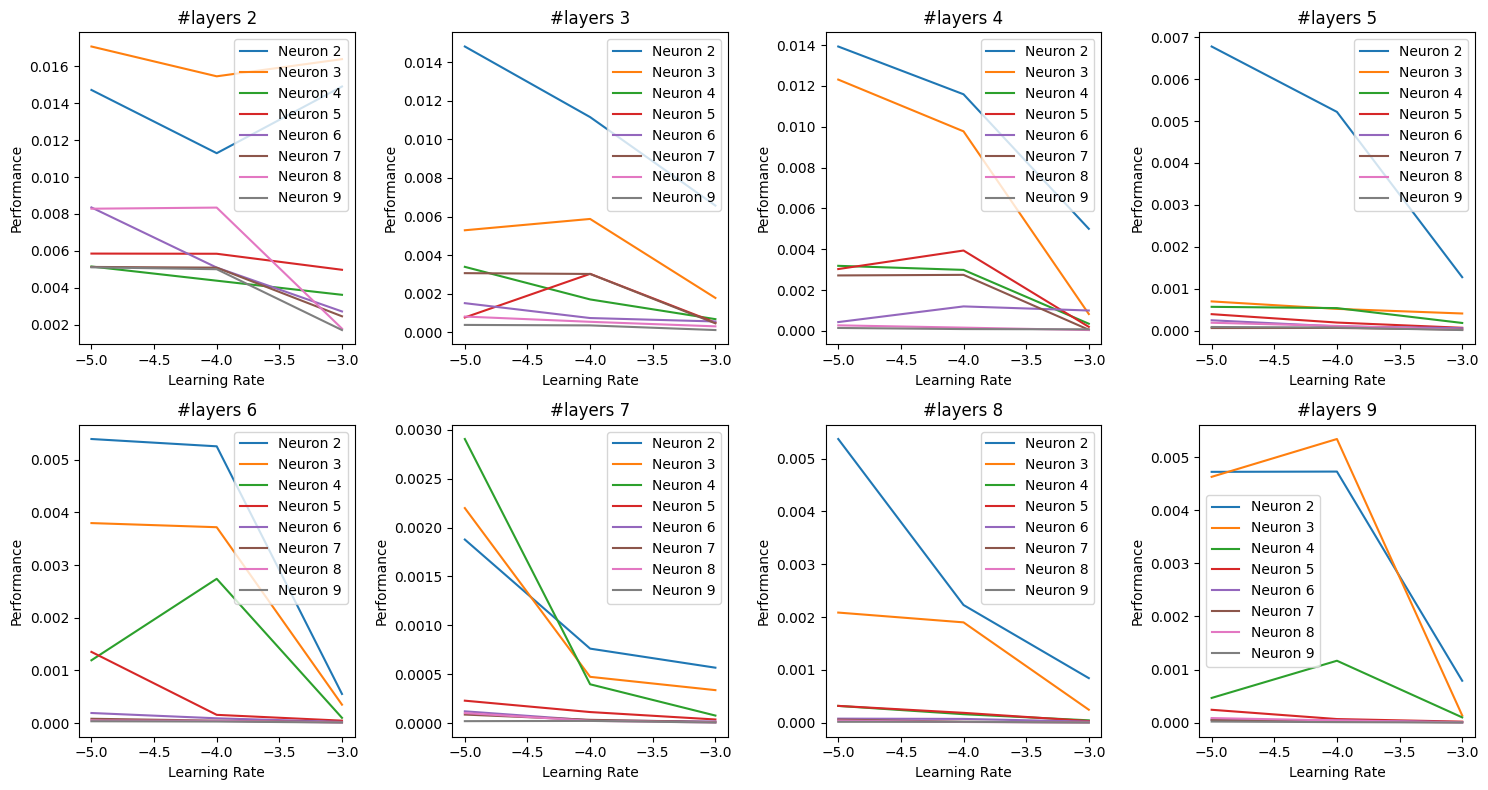

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'result_seed', 'lrs', and 'layers' are predefined
num_neurons = 8  # Number of neurons

# Create a figure with a 2x3 grid of axes
fig, axs = plt.subplots(2, 4, figsize=(15,8))  # You can adjust 'figsize' as per your need

# We are assuming that 'neuron' should be ranged from 0 to 5 for a 2x3 grid, change as needed.
for idx, layer in enumerate(range(8)):
    # Calculate indices for the subplot
    ix, iy = divmod(idx, 4)
    
    for neuron in range(8):
        # 'result_seed' should be a tensor or an array-like object containing the data you want to plot
        data = result_seed[layer, neuron, :].detach().numpy()  # Assuming it's a tensor that requires detaching
        axs[ix, iy].plot(lrs, data, label=f'Neuron {neurons[neuron]}')  # 'lrs' is used as the x variable here
    
    axs[ix, iy].legend()  # Add a legend to each subplot
    axs[ix, iy].set_title(f'#layers {layers[layer]}')  # Set titles for individual plots
    axs[ix, iy].set_xlabel('Learning Rate')  # Set the x-label for each subplot
    axs[ix, iy].set_ylabel('Performance')  # Set the y-label for each subplot; adjust as per your metric

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Best model

In [80]:
results.shape

torch.Size([10, 8, 8, 3, 3])

In [90]:
results[:,:,:,:,2].min()

tensor(1.1665e-06, grad_fn=<MinBackward1>)

In [86]:
torch.where(results == results[:,:,:,:,2].min())

(tensor([7]), tensor([7]), tensor([7]), tensor([0]), tensor([2]))

# Save model for further use

In [87]:
seed = SEEDs[7]
num_layer = layers[7]
num_neuron = neurons[7]
lr = lrs[0]

In [88]:
exp_setup = f'{num_layer}_{num_neuron}_{lr}_{seed}'

In [89]:
NN_temp = torch.load(f'./NNs/constrainter_{exp_setup}')

for x_train, y_train in train_loader:
    prediction_train = NN_temp(x_train)
for x_valid, y_valid in valid_loader:
    prediction_valid = NN_temp(x_valid)
for x_test, y_test in test_loader:
    prediction_test = NN_temp(x_test)

loss_train = lossfunction(y_train, prediction_train)
loss_valid = lossfunction(y_valid, prediction_valid)
loss_test  = lossfunction(y_test,  prediction_test)

loss_test

tensor(1.1665e-06, grad_fn=<MseLossBackward>)

In [91]:
torch.save(NN_temp, './constraint.model')

# Visualization

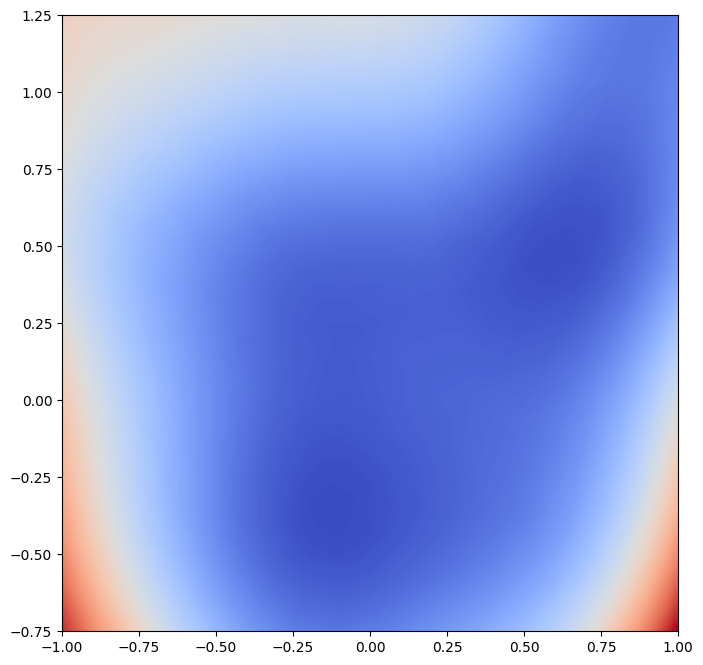

In [92]:
x_vis = torch.linspace(-1,1,500)
y_vis = torch.linspace(-0.75,1.25,500)

X_data = torch.zeros(250000,2)
for i in range(500):
    for j in range(500):
        X_data[j+500*i,0] = x_vis[i]
        X_data[j+500*i,1] = y_vis[j]

X_min = torch.tensor([-1.0, -0.75])
X_max = torch.tensor([1.0, 1.25])
Y_min = torch.tensor([0.0])
Y_max = torch.tensor([4.0])
Xn_data = (X_data - X_min) / (X_max - X_min)
Yn_data = NN_temp(Xn_data)

Y_data = Y_min + Yn_data * (Y_max - Y_min)

# Visualize data
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(X_data[:, 0].numpy(), X_data[:, 1].numpy(), c=Y_data.detach().numpy(), s=5, cmap='coolwarm')
ax.set_xlim(-1, 1)
ax.set_ylim(-0.75, 1.25)
ax.set_aspect('equal')